# **Introducción a HCP**
---

- **Fecha de entrega**: 2023-03-11 hasta las 23:59
- **Tema**: Taller 1 - Regresión.
- **Entrega**: https://forms.gle/f5SDciL69RkGGnr39

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## Datos
---

Este punto debe solucionarse a partir del siguiente conjunto de datos:

In [ ]:
data = pd.read_parquet("https://drive.google.com/uc?export=view&id=1VGFo8Ds6PmXegNtifdpk8-7_dNOb7Mur")
x, y = data.x.values, data.y.values

Text(0, 0.5, '$y$')

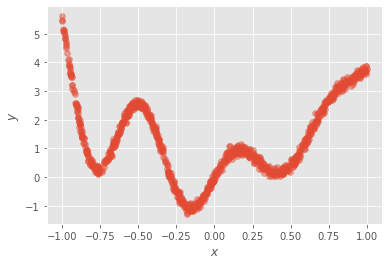

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

## Parte 1
---

Implemente un modelo de regresión lineal sobre los datos usando `numpy` (sin usar `sklearn`):

In [ ]:
# Scoeficientes
beta_1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
beta_0 = np.mean(y) - beta_1 * np.mean(x)
w = beta_0 + beta_1 * x


## Parte 2
---

Utilizando el vector `x_test`, genere un vector de predicciones `y_pred`:

In [ ]:
x_test = np.linspace(-1, 1, 100)
# Su código aquí
y_pred = beta_0 + beta_1 * x_test

Utilice la siguiente celda para revisar el resultado:

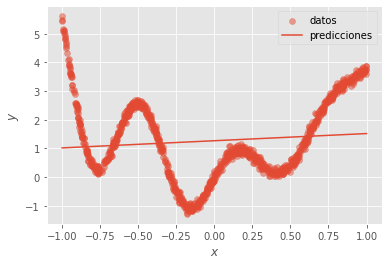

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, label="datos")
ax.plot(x_test, y_pred, label="predicciones")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()

## Parte 3
---

Según lo observado, el modelo de regresión lineal es apropiado para los datos?

el modelo de regresión lineal no es apropiado para los datos debido a que no está generalizado y hay demasiada dispersión 

## Parte 4
---

Genere una matriz de características a partir de los datos `x`. Por ejemplo:

$$
\mathbf{x_i} = [x ^ 0, x ^ 1, x ^ 2, x ^ 3]
$$

In [ ]:
# EXEMPLO
X = np.vander(x, 4)
print(X[0])
print([x[0] ** i for i in range(4)][::-1])

[0.39760127 0.54071096 0.73533051 1.        ]
[0.3976012667615668, 0.540710960354759, 0.7353305109641235, 1.0]


Puede usar cualquier función aritmética/geométrica para transformar los datos, lo importante es que resulte como una matriz de $(N, m)$ (muestras por características).

In [ ]:
def transform(x):
    X = np.column_stack((np.ones(len(x)), x, x**2, x**3))
    return X

## Parte 5
---

Entrene un modelo de regresión lineal con los datos transformados, seleccione unas transformaciones que den la mejor aproximación a los datos.

In [ ]:
X = transform(x)

from itertools import combinations

# Probar todas las combinaciones posibles de características hasta la potencia 3
best_score = 0
best_features = None

for i in range(1, 4):
    for combo in combinations(range(1, 4), i):
        features = [0] + list(combo)
        X_train = X[:, features]
        beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y
        y_pred = X_train @ beta
        score = np.corrcoef(y_pred, y)[0, 1]**2
        if score > best_score:
            best_score = score
            best_features = features

print('Mejor combinación de características:', best_features)
#la mejor combinación es [0, 1, 2, 3] (es decir, intercepto, x y x^2 y^2).

Mejor combinación de características: [0, 1, 2, 3]


## Parte 6
---

Genere predicciones a partir del vector `x_test`:

In [ ]:
x_test = np.linspace(-1, 1, 100)
X_test = transform(x_test)
# Su código aquí
x_test = np.column_stack((np.ones(len(x_test)), x_test, x_test**2))

# Coeficientes del modelo ajustado
beta = np.linalg.inv(X[:, best_features].T @ X[:, best_features]) @ X[:, best_features].T @ y

y_pred = X_test @ beta

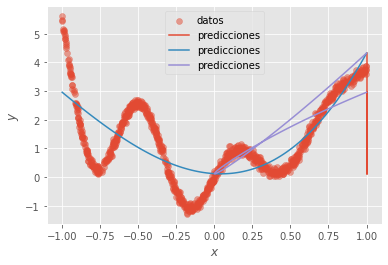

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, label="datos")
ax.plot(x_test, y_pred, label="predicciones")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()

## Parte 7
---

Revise el modelo [Ridge Regression](https://en.wikipedia.org/wiki/Ridge_regression#:~:text=Ridge%20regression%20is%20a%20method,econometrics%2C%20chemistry%2C%20and%20engineering.):

Encuentre la solución analítica de ridge regression usando álgebra lineal (muestre y explique el paso a paso de la deducción).

La Ridge Regression es un modelo de regresión lineal que se utiliza para prevenir el sobreajuste en datos con alta multicolinealidad.Para deducir la solución analítica de Ridge Regression, primero necesitamos definir la función de costo que queremos minimizar. En este caso, la función de costo se define como:

$j(w)=\sum_{i=1}^{m}(y_{i}-{x_{i}}^{T}w)^{2}+\alpha \sum_{j=1}^{n}w_{j}^{2}$

​donde $m$ es el número de muestras, $n$ es el número de características, $\mathbf{x_i}$ es el vector de características de la muestra $i$, $\mathbf{w}$ es el vector de pesos, $y_i$ es la etiqueta verdadera de la muestra $i$, y $\alpha$ es un hiperparámetro de regularización.

La primera suma en la función de costo representa el error de predicción para todas las muestras, y la segunda suma representa la penalización por el tamaño de los pesos. El parámetro $\alpha$ controla la fuerza de la penalización. Si $\alpha$ es muy grande, los pesos se reducirán a cero y la solución será la línea de base. Si $\alpha$ es muy pequeño, la solución se parecerá a la solución de regresión lineal ordinaria.

Para encontrar la solución analítica, necesitamos encontrar el valor de $\mathbf{w}$ que minimiza la función de costo $J(w)$. Podemos hacer esto mediante el gradiente descendente o mediante la solución analítica.

Para obtener la solución analítica de Ridge Regression, primero debemos escribir la función de costo en forma matricial. Podemos hacer esto escribiendo la suma de errores como una matriz de suma de cuadrados:

$j(w)=(y-Xw)^T(y-Xw)+\alpha w^Tw$

donde $\mathbf{X}$ es la matriz de características de tamaño $m \times n$, $\mathbf{y}$ es el vector de etiquetas verdaderas de tamaño $m \times 1$, y $\mathbf{w}$ es el vector de pesos de tamaño $n \times 1$.

Ahora, necesitamos minimizar la función de costo con respecto a $\mathbf{w}$. Podemos hacer esto tomando la derivada de $J(w)$ con respecto a $\mathbf{w}$ y estableciéndola igual a cero:

$\frac{\partial J(w)}{\partial w}=-2X^T(y-Xw)+2\alpha w = 0$

Despejando $\mathbf{w}$, obtenemos la solución analítica de Ridge Regression:

$w = (X^T X +\alpha I)^{-1}X^Ty$

donde $\mathbf{I}$ es la matriz

## Parte 8
---

Implemente la solución analítica de Ridge Regression:

In [ ]:
from numpy.linalg import inv
X = transform(x)
k = 0.1 # hiperparámetro de regularización de ridge regression
# Calcular la solución analítica de Ridge Regression
w = np.linalg.inv(X.T.dot(X) + k * np.identity(X.shape[1])).dot(X.T).dot(y)


## Parte 9
---

Genere predicciones a partir del vector `x_test`:

In [ ]:
x_test = np.linspace(-1, 1, 100)
X_test = transform(x_test)

y_pred = X_test.dot(w)


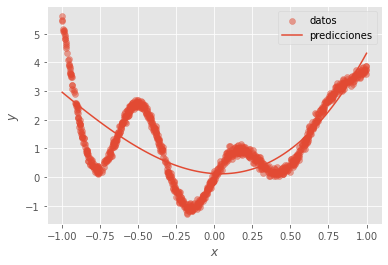

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, label="datos")
ax.plot(x_test, y_pred, label="predicciones")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()

## Parte 10
---

Cambie el hiperparámetro de regularización `k` de ridge regression. Responda las siguientes preguntas:

* Qué efecto tiene ese hiperparámetro sobre las predicciones?

A medida que aumentamos el valor de k, el modelo se vuelve más regularizado, lo que significa que los coeficientes de regresión se vuelven más pequeños en magnitud. Esto puede tener el efecto de reducir la varianza del modelo, es decir, la sensibilidad del modelo a los cambios en los datos de entrenamiento.

Por otro lado, si el valor de k es demasiado grande, puede ocurrir una "sobrerregularización", lo que significa que el modelo se ajusta demasiado a los datos de entrenamiento y pierde su capacidad para generalizar a nuevos datos.

* Qué efecto tiene ese hiperparámetro sobre los parámetros del modelo $w$?

En el modelo w, el hiperparametro hace que la predicciòn sea más regularizada, se ajusta de manera regularizada a los datos nuevos.

* Por qué se usa este hiperparámetro?

se utiliza para controlar la complejidad del modelo y prevenir el sobreajuste, lo que ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento, lo que resulta en un bajo error de entrenamiento pero un alto error de prueba en datos no vistos. La regularización se aplica para reducir la magnitud de los coeficientes de regresión y evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

* Qué es regularización en los modelos de machine learning?

Es una técnica que ayuda a evitar el sobreajuste y mejor la capacidad de generalizaciòn del moedlo, funciona añadiendo una penalización a la función de coste del modelo que está relacionada con la magnitud de los coeficientes de regresión o pesos del modelo. La idea es penalizar los valores grandes de los coeficientes y forzarlos a ser más pequeños, lo que puede reducir la complejidad del modelo y hacerlo más generalizable.